# 导库

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# 加载数据

In [3]:
#load_dataset
flow_df = pd.read_csv('./data/Flow.csv')

# 处理数据

## Flow.csv

In [4]:
flow_df['START_TIME'] = pd.to_datetime(flow_df['START_TIME'])
flow_df['END_TIME'] = pd.to_datetime(flow_df['END_TIME'])

In [5]:
flow_df['LANE_ARM']=flow_df['LANE_ID'].astype(str)+flow_df['ARM_ID']

In [6]:
lane_arm = flow_df.pop("LANE_ARM")
flow_df.insert(2,'LANE_ARM',lane_arm)

In [7]:
flow_df.drop(['LANE_ID','ARM_ID'],axis = 1,inplace = True)

In [8]:
flow_df = flow_df.set_index('START_TIME')
flow_df

,LANE_ARM,END_TIME,VOLUMN_5MIN
START_TIME,,,
2023-08-01 00:05:00,1E,2023-08-01 00:10:00,2
2023-08-01 00:10:00,1E,2023-08-01 00:15:00,1
2023-08-01 00:15:00,1E,2023-08-01 00:20:00,0
2023-08-01 00:20:00,1E,2023-08-01 00:25:00,1
2023-08-01 00:25:00,1E,2023-08-01 00:30:00,0
...,...,...,...
2023-08-27 23:35:00,4W,2023-08-27 23:40:00,0
2023-08-27 23:40:00,4W,2023-08-27 23:45:00,0
2023-08-27 23:45:00,4W,2023-08-27 23:50:00,0


In [9]:
LANE_ARM_uniqe =flow_df['LANE_ARM'].unique()
LANE_ARM_uniqe

array(['1E', '1N', '1S', '1W', '2E', '2N', '2S', '2W', '3E', '3N', '3S',
       '3W', '4E', '4N', '4S', '4W'], dtype=object)

In [10]:
# 按LANE_ARM分组
df_flow_1E = flow_df[flow_df['LANE_ARM']=='1E']
df_flow_1N = flow_df[flow_df['LANE_ARM']=='1N']
df_flow_1S = flow_df[flow_df['LANE_ARM']=='1S']
df_flow_1W = flow_df[flow_df['LANE_ARM']=='1W']

df_flow_2E = flow_df[flow_df['LANE_ARM']=='2E']
df_flow_2N = flow_df[flow_df['LANE_ARM']=='2N']
df_flow_2S = flow_df[flow_df['LANE_ARM']=='2S']
df_flow_2W = flow_df[flow_df['LANE_ARM']=='2W']

df_flow_3E = flow_df[flow_df['LANE_ARM']=='3E']
df_flow_3N = flow_df[flow_df['LANE_ARM']=='3N']
df_flow_3S = flow_df[flow_df['LANE_ARM']=='3S']
df_flow_3W = flow_df[flow_df['LANE_ARM']=='3W']

df_flow_4E = flow_df[flow_df['LANE_ARM']=='4E']
df_flow_4N = flow_df[flow_df['LANE_ARM']=='4N']
df_flow_4S = flow_df[flow_df['LANE_ARM']=='4S']
df_flow_4W = flow_df[flow_df['LANE_ARM']=='4W']

In [11]:
# 合并车流量
LANE_ARM = [df_flow_1E
,df_flow_1N
,df_flow_1S
,df_flow_1W
,df_flow_2E
,df_flow_2N
,df_flow_2S
,df_flow_2W
,df_flow_3E
,df_flow_3N
,df_flow_3S
,df_flow_3W
,df_flow_4E
,df_flow_4N
,df_flow_4S
,df_flow_4W]
for i in LANE_ARM:
    print(i.shape)


(7549, 3)
(7549, 3)
(7549, 3)
(7548, 3)
(7549, 3)
(7549, 3)
(7549, 3)
(7548, 3)
(7549, 3)
(7549, 3)
(7549, 3)
(7548, 3)
(7549, 3)
(7549, 3)
(7549, 3)
(7548, 3)


In [12]:
df_flow_3E

,LANE_ARM,END_TIME,VOLUMN_5MIN
START_TIME,,,
2023-08-01 00:05:00,3E,2023-08-01 00:10:00,0
2023-08-01 00:10:00,3E,2023-08-01 00:15:00,2
2023-08-01 00:15:00,3E,2023-08-01 00:20:00,0
2023-08-01 00:20:00,3E,2023-08-01 00:25:00,0
2023-08-01 00:25:00,3E,2023-08-01 00:30:00,0
...,...,...,...
2023-08-27 23:35:00,3E,2023-08-27 23:40:00,0
2023-08-27 23:40:00,3E,2023-08-27 23:45:00,1
2023-08-27 23:45:00,3E,2023-08-27 23:50:00,0


In [13]:
df_flow_1E

,LANE_ARM,END_TIME,VOLUMN_5MIN
START_TIME,,,
2023-08-01 00:05:00,1E,2023-08-01 00:10:00,2
2023-08-01 00:10:00,1E,2023-08-01 00:15:00,1
2023-08-01 00:15:00,1E,2023-08-01 00:20:00,0
2023-08-01 00:20:00,1E,2023-08-01 00:25:00,1
2023-08-01 00:25:00,1E,2023-08-01 00:30:00,0
...,...,...,...
2023-08-27 23:35:00,1E,2023-08-27 23:40:00,1
2023-08-27 23:40:00,1E,2023-08-27 23:45:00,0
2023-08-27 23:45:00,1E,2023-08-27 23:50:00,0


In [14]:
# 合并车流量
LANE_ARM = [
df_flow_1N
,df_flow_1S
,df_flow_1W
,df_flow_2E
,df_flow_2N
,df_flow_2S
,df_flow_2W
,df_flow_3E
,df_flow_3N
,df_flow_3S
,df_flow_3W
,df_flow_4E
,df_flow_4N
,df_flow_4S
,df_flow_4W]

merged_flow = df_flow_1E['VOLUMN_5MIN']


In [15]:
merged_flow

START_TIME
2023-08-01 00:05:00    2
2023-08-01 00:10:00    1
2023-08-01 00:15:00    0
2023-08-01 00:20:00    1
2023-08-01 00:25:00    0
                      ..
2023-08-27 23:35:00    1
2023-08-27 23:40:00    0
2023-08-27 23:45:00    0
2023-08-27 23:50:00    0
2023-08-27 23:55:00    0
Name: VOLUMN_5MIN, Length: 7549, dtype: int64

In [16]:
merged_flow = pd.DataFrame(merged_flow)
for i in LANE_ARM:
    merged_flow['VOLUMN_5MIN'] = merged_flow['VOLUMN_5MIN']+i['VOLUMN_5MIN']
    
merged_flow

,VOLUMN_5MIN
START_TIME,
2023-08-01 00:05:00,7.0
2023-08-01 00:10:00,11.0
2023-08-01 00:15:00,6.0
2023-08-01 00:20:00,9.0
2023-08-01 00:25:00,2.0
...,...
2023-08-27 23:35:00,14.0
2023-08-27 23:40:00,6.0
2023-08-27 23:45:00,2.0


# 数据探索
* Pharsing dates
* Ploting timeseris
* Feature engineering for EDA

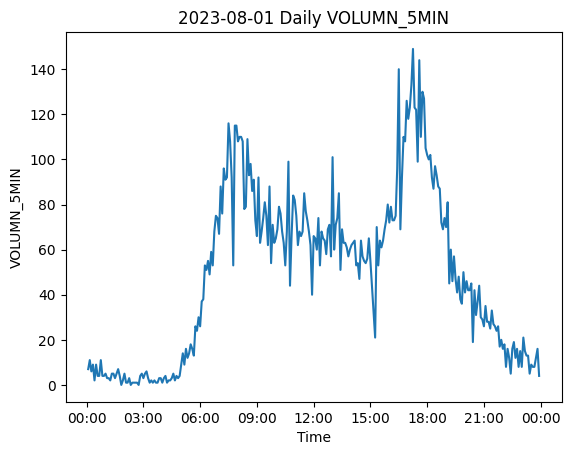

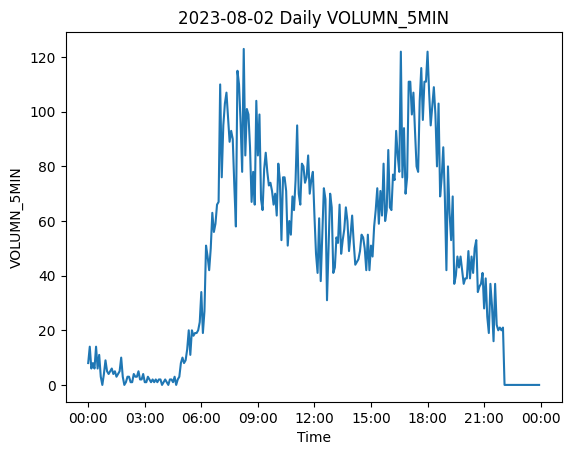

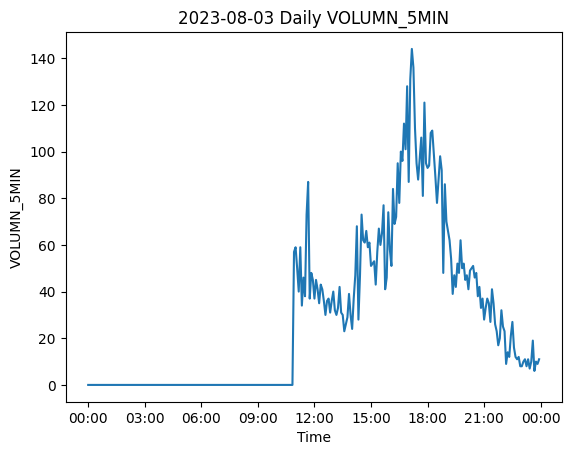

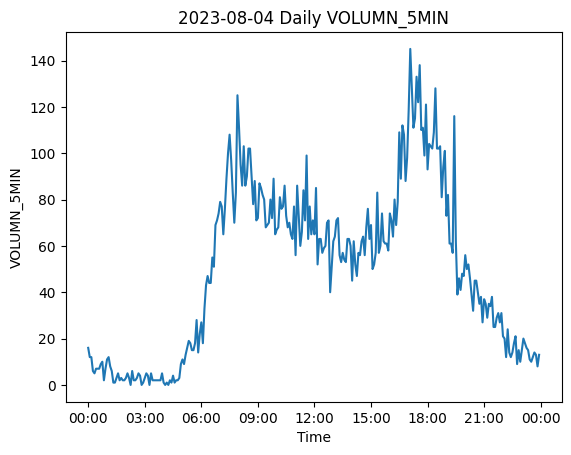

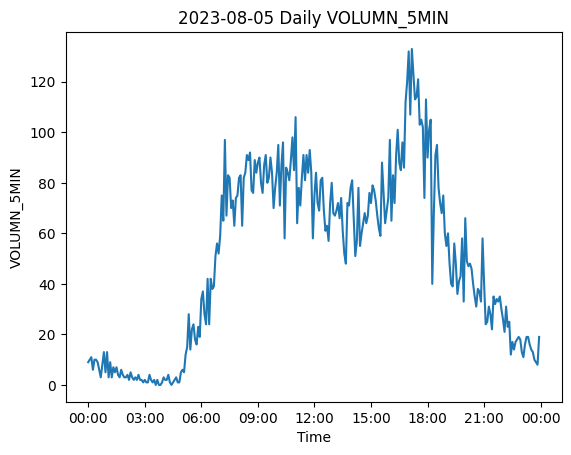

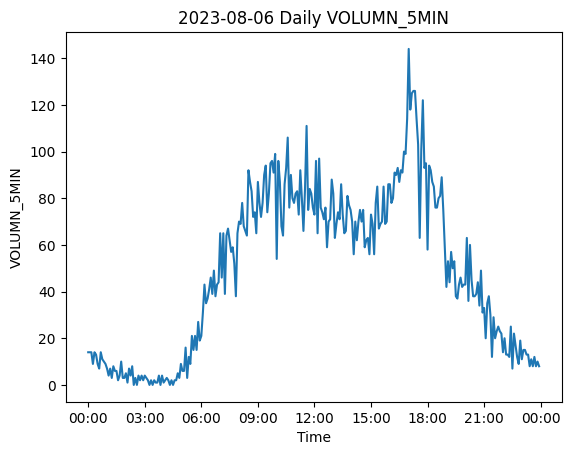

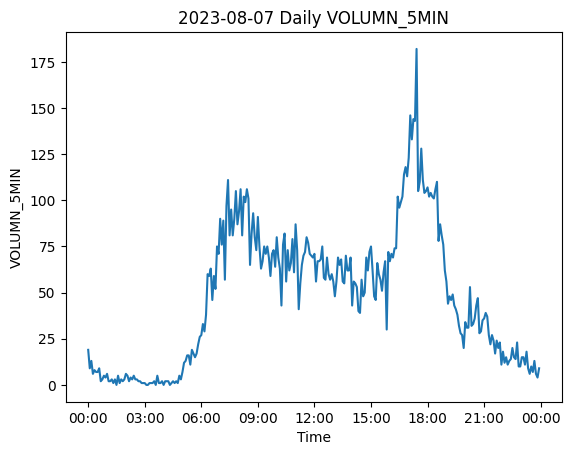

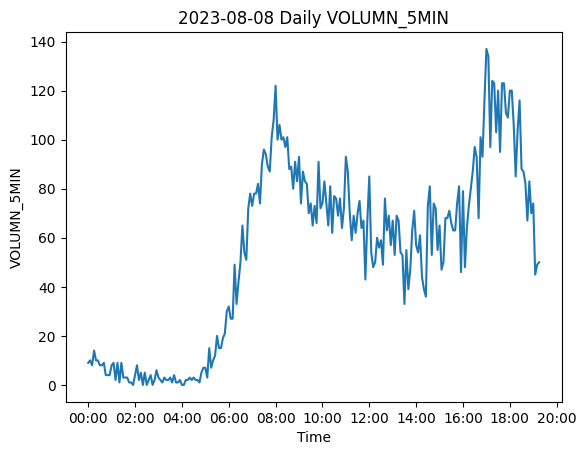

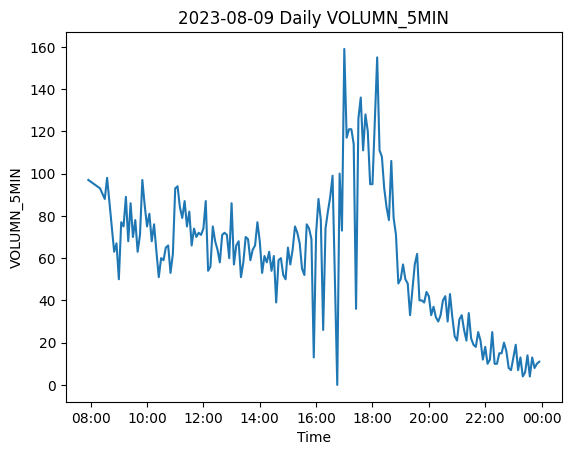

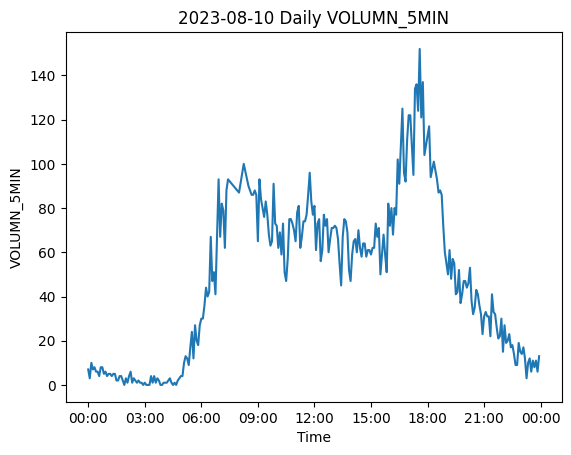

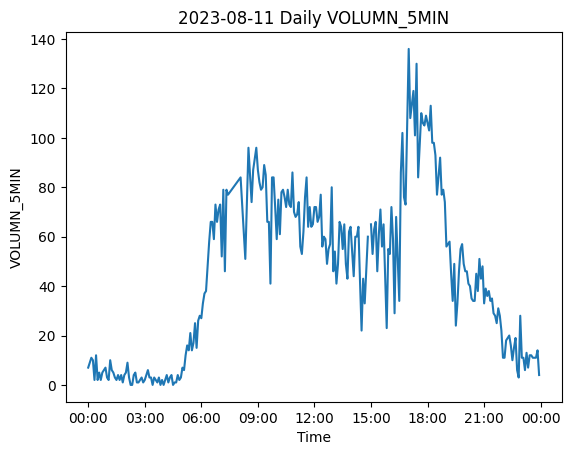

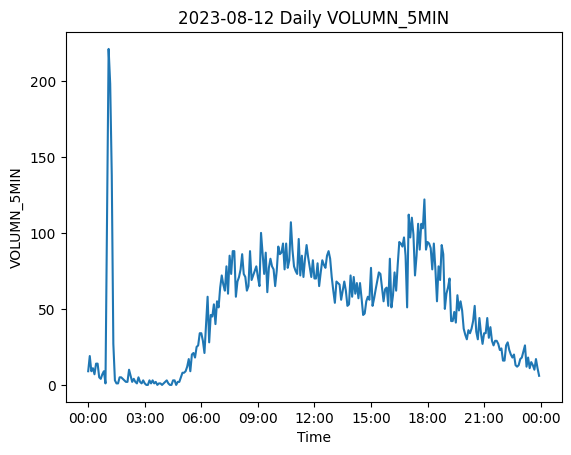

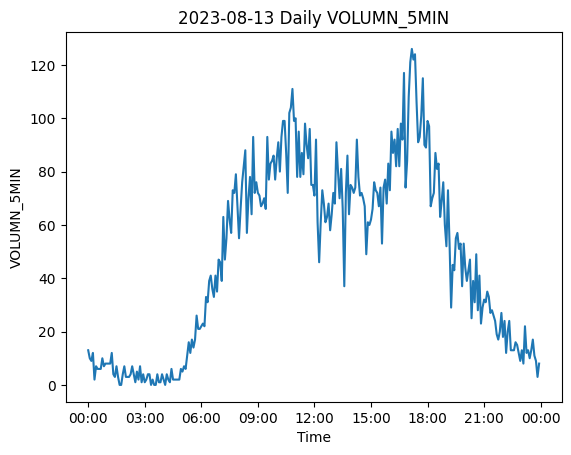

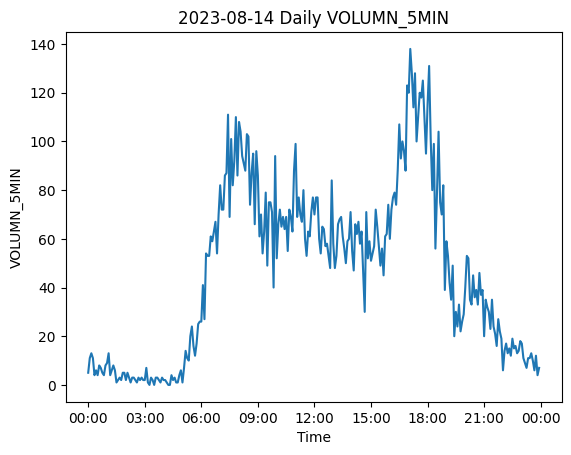

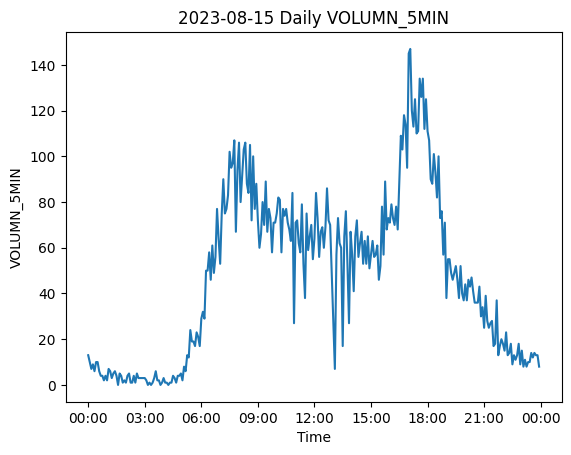

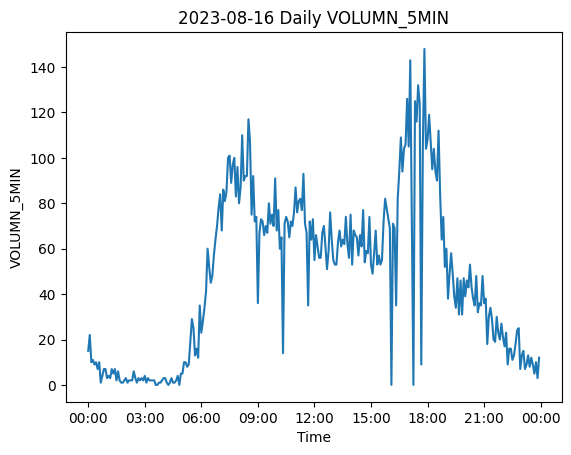

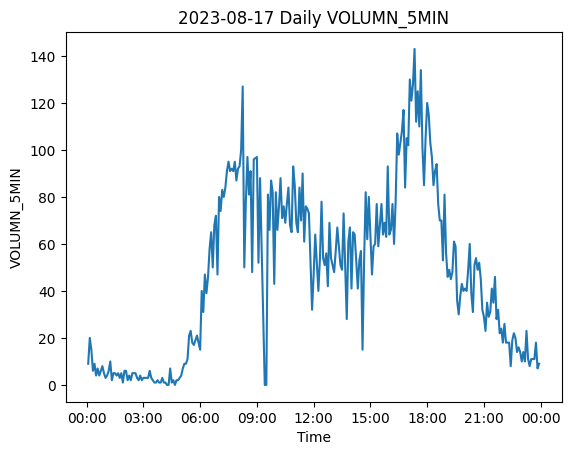

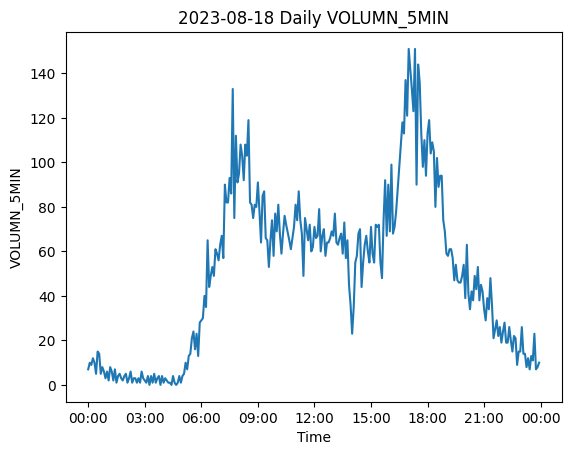

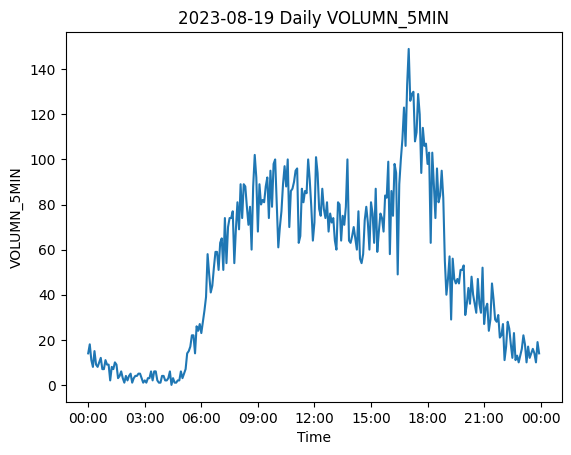

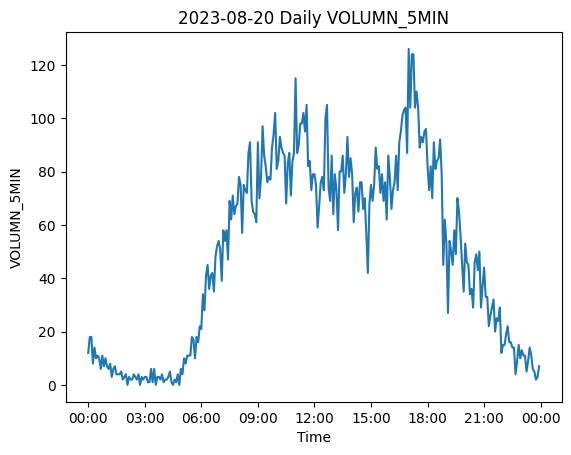

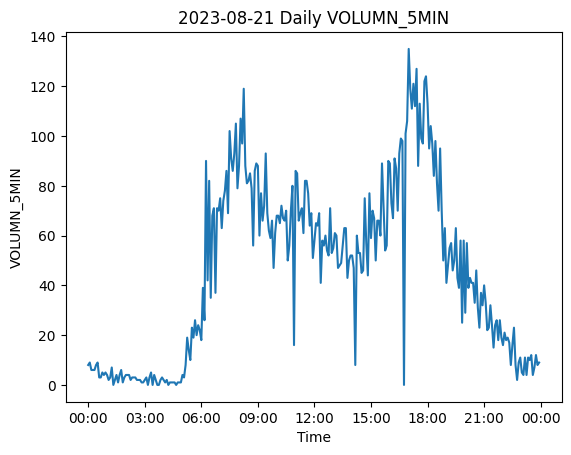

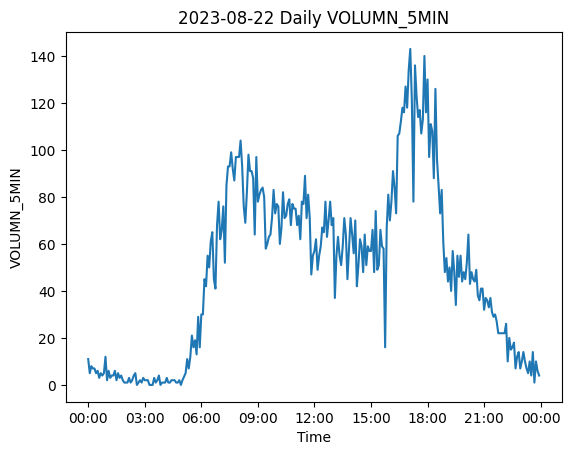

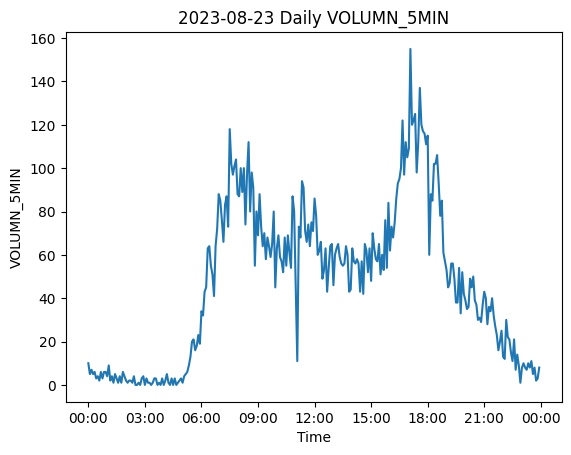

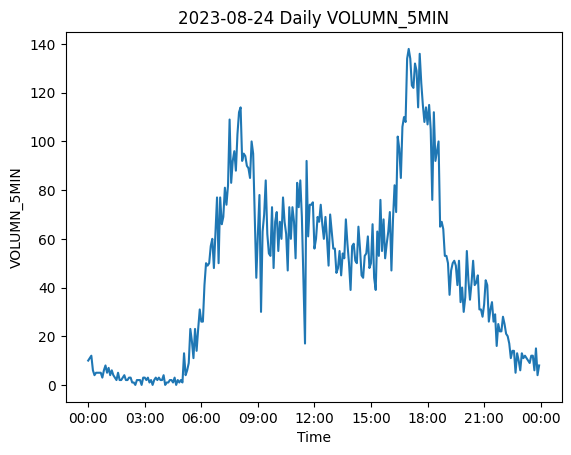

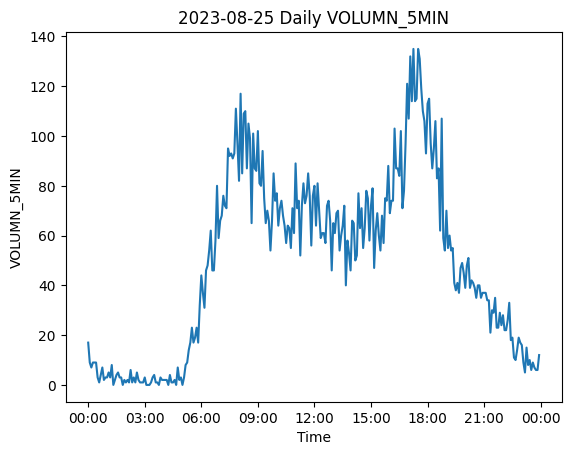

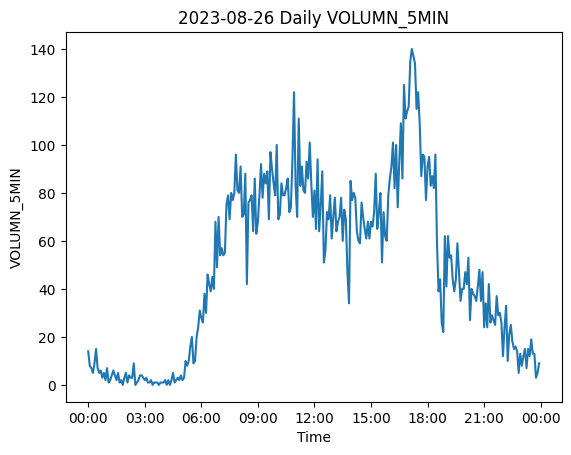

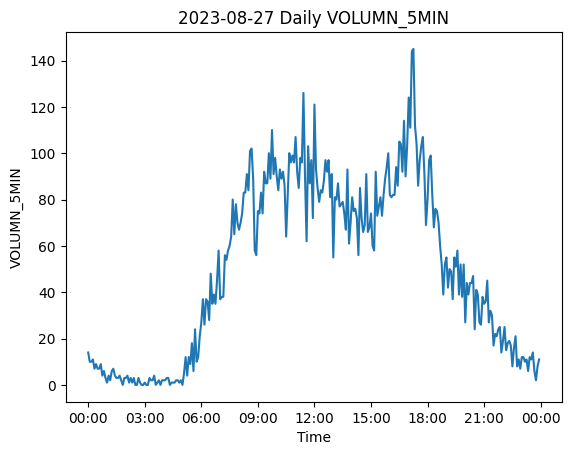

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# 按日期分组
grouped = merged_flow.groupby(pd.Grouper(freq='D'))

# 遍历每个日期的数据并画折线图
for date, data in grouped:
    plt.figure()
    plt.plot(data.index, data['VOLUMN_5MIN'])
    plt.title(str(date.date()) + " Daily VOLUMN_5MIN")
    plt.xlabel("Time")
    plt.ylabel("VOLUMN_5MIN")
    # 设置横轴格式为小时和分钟
    date_format = DateFormatter('%H:%M')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.show()

In [18]:
# 删除 2023 年 8 月 3 日和 2023 年 8 月 9 日的数据
mask = (merged_flow.index >= '2023-08-03') & (merged_flow.index < '2023-08-04') | (merged_flow.index >= '2023-08-09') & (merged_flow.index < '2023-08-10')
merged_flow = merged_flow[~mask]

# 特征工程
- Date in the given month
- Days of week
- Hour

In [19]:
df = merged_flow.copy()

In [20]:
#Exploring more features 
df["Date_no"]= df.index.day
df["Hour"]= df.index.hour
df['minute'] = df.index.strftime('%M')
df["Day"]= df.index.strftime("%A")
df.head()

,VOLUMN_5MIN,Date_no,Hour,minute,Day
START_TIME,,,,,
2023-08-01 00:05:00,7.0,1,0,05,Tuesday
2023-08-01 00:10:00,11.0,1,0,10,Tuesday
2023-08-01 00:15:00,6.0,1,0,15,Tuesday
2023-08-01 00:20:00,9.0,1,0,20,Tuesday
2023-08-01 00:25:00,2.0,1,0,25,Tuesday


In [21]:
# 检查DataFrame中的空值
is_null = df['VOLUMN_5MIN'].isnull()
print(df[is_null])
# 计算每列中的空值数量
null_count = is_null.sum()
print(null_count)

                     VOLUMN_5MIN  Date_no  Hour minute     Day
START_TIME                                                    
2023-08-11 14:55:00          NaN       11    14     55  Friday
1


In [22]:
# 使用前一个非缺失值进行填充
df['VOLUMN_5MIN'].fillna(method='ffill', inplace=True)

In [23]:
#df['VOLUMN_5MIN']d = df['VOLUMN_5MIN'].astype(np.float64)

In [24]:
#df['VOLUMN_5MIN'][df['VOLUMN_5MIN'] == np.inf] = np.nan
#array = np.nan_to_num(df['VOLUMN_5MIN'])

# Exploratory Data Analysis


In [25]:
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


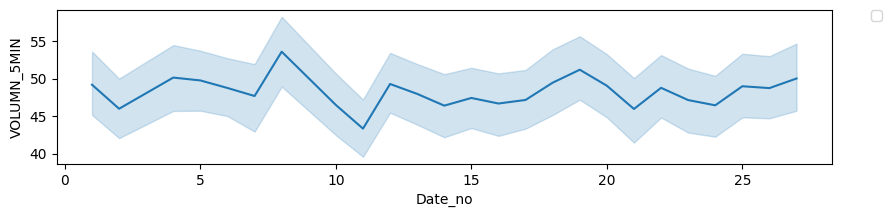

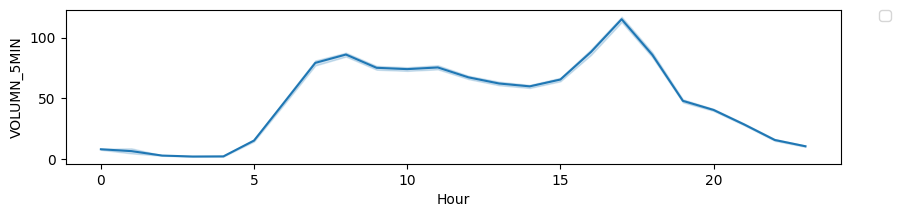

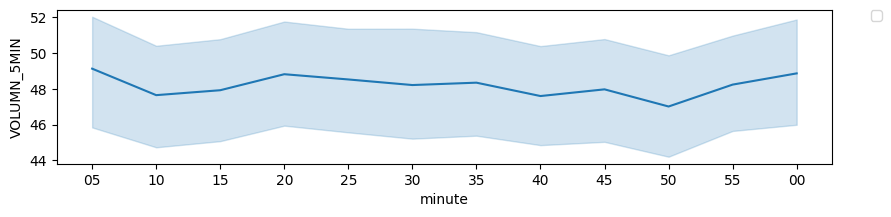

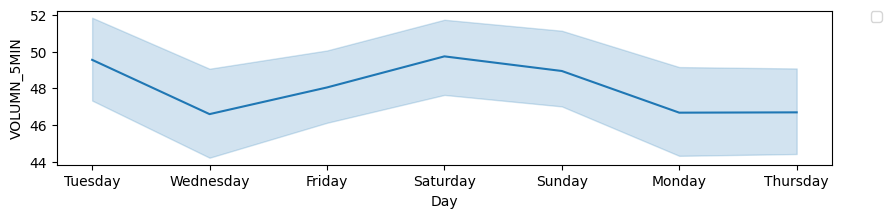

In [26]:
#plot the Timeseries
new_features = [ "Date_no", "Hour", "minute","Day"]
for i in new_features:
    plt.figure(figsize=(10,2))
    ax=sns.lineplot(x=df[i],y="VOLUMN_5MIN",data=df )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

- 日：8号最高峰 11号最低。温度？ 天气？

- 小时：驼峰，7-9早高峰；5-7晚高峰


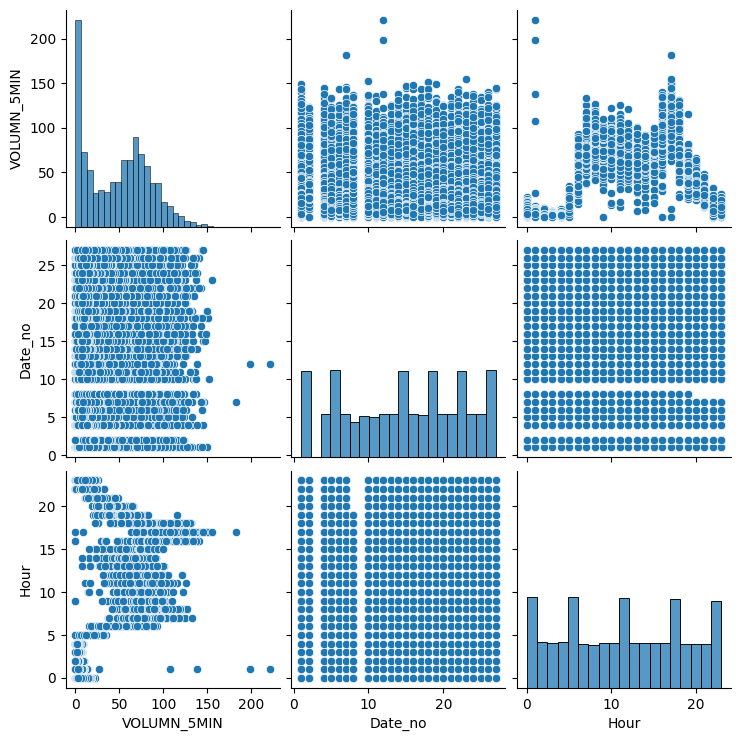

In [27]:
sns.pairplot(data=df,palette=colors)

In [28]:
df.describe()

,VOLUMN_5MIN,Date_no,Hour
count,7077.000000,7077.000000,7077.000000
mean,48.195139,14.706797,11.430126
std,35.761492,7.729205,6.911770
min,0.000000,1.000000,0.000000
25%,11.000000,8.000000,5.000000
50%,51.000000,15.000000,11.000000
75%,75.000000,21.000000,17.000000
max,221.000000,27.000000,23.000000


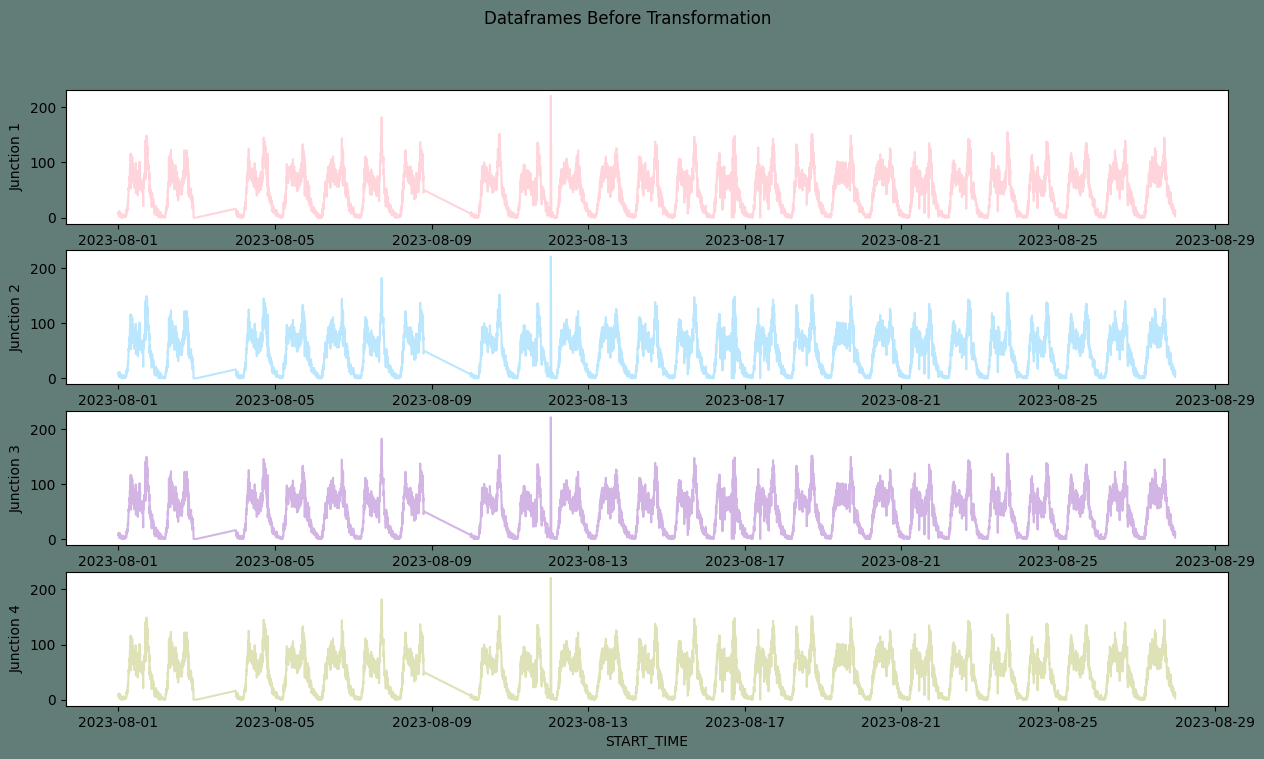

In [29]:
#Function to plot comparitive plots of dataframes
def Sub_Plots4(df_1, df_2,df_3,df_4,title):
    fig, axes = plt.subplots(4, 1, figsize=(15, 8),facecolor="#627D78", sharey=True)
    fig.suptitle(title)
    #J1
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[0])
    #pl_1=plt.ylabel()
    axes[0].set(ylabel ="Junction 1")
    #J2
    pl_2=sns.lineplot(ax=axes[1],data=df_2,color=colors[1])
    axes[1].set(ylabel ="Junction 2")
    #J3
    pl_3=sns.lineplot(ax=axes[2],data=df_3,color=colors[2])
    axes[2].set(ylabel ="Junction 3")
    #J4
    pl_4=sns.lineplot(ax=axes[3],data=df_4,color=colors[3])
    axes[3].set(ylabel ="Junction 4")

#Plotting the dataframe to check for stationarity
Sub_Plots4(df["VOLUMN_5MIN"], df["VOLUMN_5MIN"],df["VOLUMN_5MIN"],df["VOLUMN_5MIN"],"Dataframes Before Transformation")

In [30]:
# 删除 2023 年 8 月 3 日和 2023 年 8 月 9 日的数据
#mask = (df.index >= '2023-08-03') & (df.index < '2023-08-04') | (df.index >= '2023-08-09') & (df.index < '2023-08-10')
#df = df[~mask]

In [35]:
#Differencing created some NA values as we took a weeks data into consideration while difrencing
#df_Diff = df_Nor["Diff"].dropna()
#df_Diff = df_Diff.to_frame()

#Splitting the dataset
def Split_data(df):
    training_size = int(len(df)*0.90)
    data_len = len(df)
    train, test = df[0:training_size],df[training_size:data_len] 
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test
#Splitting the training and test datasets 
df_train, df_test = Split_data(df["VOLUMN_5MIN"])

#Target and Feature
def TnF(df,steps):
    end_len = len(df)
    X = []
    y = []
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    return X ,y

#fixing the shape of X_test and X_train
def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0],test.shape[1],1))
    return train, test


# Model Building


In [56]:
#Model for the prediction
def GRU_model(X_Train, y_Train, X_Test,epochs,batch_size):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True) 
    #callback delta 0.01 may interrupt the learning, could eliminate this step, but meh!
    
    #The GRU model 
    model = Sequential()
    #model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    #model.add(Dropout(0.2))
    #model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    #model.add(Dropout(0.2))
    #model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    #model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True,  input_shape=(X_Train.shape[1],1),activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, input_shape=(X_Train.shape[1],1), activation='tanh'))
    #model.add(Dropout(0.2))
    model.add(Dense(units=1))
    #Compiling the model
    model.compile(optimizer=SGD(learning_rate=1e-7, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, epochs=epochs, batch_size=batch_size,callbacks=[early_stopping])
    pred_GRU= model.predict(X_Test)
    return model , pred_GRU

#To calculate the root mean squred error in predictions
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

# 定义评价指标 SMAPE 函数
ep = 0.0000000001
def SMAPE_Value(test, predicted):
    smape = np.mean(np.abs(np.array(predicted) -np.array(test)) / (  ( np.abs(np.array(predicted)) + np.abs(np.array(test)) ) / 2  ) + ep )
    print("The SMAPE is {}".format(smape)) 
    return smape

#To plot the comparitive plot of targets and predictions
def PredictionsPlot(test,predicted,m):
    plt.figure(figsize=(12,5),facecolor="#627D78")
    plt.plot(test, color=colors[m],label="True Value",alpha=0.5 )
    plt.plot(predicted, color="#627D78",label="Predicted Values")
    plt.title("GRU Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

# Fitting The Model

Now, I will be fitting the transformed training sets of four junctions to the model created and compare them to the transformed test sets. 

**Fitting the first junction and plotting the predictions and testset**

Epoch 1/50
64/64 [==============================] - 7s 31ms/step - loss: 3522.1357
Epoch 2/50
64/64 [==============================] - 2s 32ms/step - loss: 3503.6931
Epoch 3/50
64/64 [==============================] - 2s 32ms/step - loss: 3485.5308
Epoch 4/50
64/64 [==============================] - 2s 32ms/step - loss: 3468.3181
Epoch 5/50
64/64 [==============================] - 2s 34ms/step - loss: 3450.8911
Epoch 6/50
64/64 [==============================] - 2s 32ms/step - loss: 3433.1223
Epoch 7/50
64/64 [==============================] - 2s 32ms/step - loss: 3414.5090
Epoch 8/50
64/64 [==============================] - 2s 33ms/step - loss: 3395.7681
Epoch 9/50
64/64 [==============================] - 2s 33ms/step - loss: 3377.1309
Epoch 10/50
64/64 [==============================] - 2s 33ms/step - loss: 3357.0901
Epoch 11/50
64/64 [==============================] - 2s 32ms/step - loss: 3336.9155
Epoch 12/50
64/64 [==============================] - 2s 33ms/step - loss: 3316.5344
E

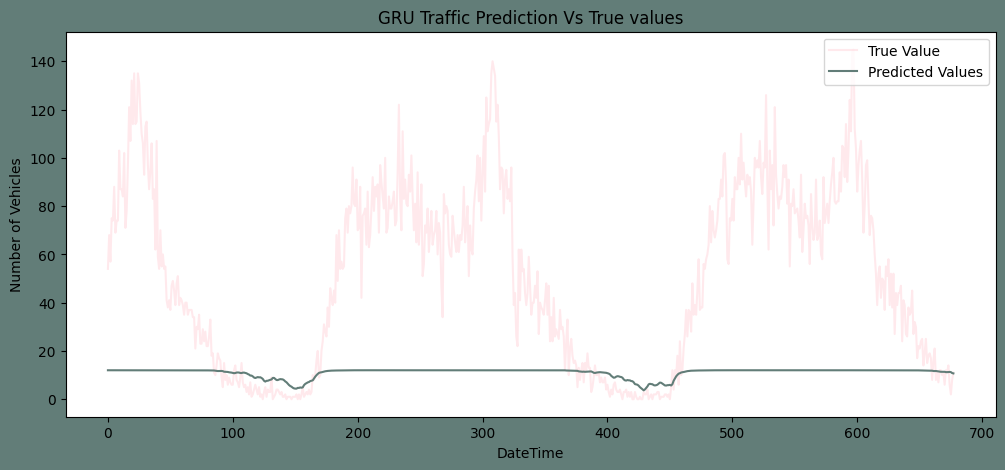

In [57]:
steps = 30
#Assigning features and target 
X_train, y_train = TnF(df_train,steps)
X_test, y_test = TnF(df_test,steps)
X_train, X_test = FeatureFixShape(X_train, X_test)
#Predictions
model,Pred = GRU_model(X_train,y_train,X_test,50,100)
#Results for J1 
RMSE_Value(y_test,Pred)
SMAPE_Value(y_test,Pred)
PredictionsPlot(y_test,Pred,0)


# Inversing The Transformation Of Data

In this section, I will be inversing transforms that I applied to the datasets to remove the seasonality and trends. 
Performing this step will make the predictions get back on the accurate scale. 

Resource to the inversion process [Link](https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/)

In [38]:
# Functions to inverse transforms and Plot comparitive plots
# invert differenced forecast
def inverse_difference(last_ob, value):
    inversed = value + last_ob
    return inversed
#Plotting the comparison
def Sub_Plots2(df_1, df_2,title,m):
    fig, axes = plt.subplots(1, 2, figsize=(18,4), sharey=True,facecolor="#627D78")
    fig.suptitle(title)
    
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[m])
    axes[0].set(ylabel ="Prediction")
    
    pl_2=sns.lineplot(ax=axes[1],data=df_2["VOLUMN_5MIN"],color="#627D78")
    axes[1].set(ylabel ="Orignal")

**the inverse transform on the first junction**

In [40]:
# 设定预测时间步数
pre_steps = 288

In [41]:
def predict(model, pre_inputs, pre_steps):
    pred = []

    load = pre_inputs[:,0]
    #load = np.array(load)
    for i in range(pre_steps):
        seq = []
        for i in range(len(load) - steps, len(load)):
            seq.append([load[i]])
        seq = [seq]
        seq = [x for x in iter(seq)][0]

        seq = np.array(seq)
        # 开始预测
        seq = np.reshape(seq, (seq.shape[0],seq.shape[1],1))
        y_pred = model.predict(seq)
        load = np.append(load, y_pred)
        pred.extend(y_pred)
        print("-------------",y_pred,"################")

    pred = np.array(pred)
    print("++++++++++++++++",len(pred))


    # invert the differenced forecast for Junction 1 
    #recover1 = df_Nor.Norm[-288:-1].to_frame()
    #recover1["Pred"]= pred[:287]
    #Transform_reverssed = inverse_difference(recover1.Norm, recover1.Pred).to_frame()
    #Transform_reverssed.columns = ["Pred_Normed"]
    #Invert the normalizeation J1
    #Final_Pred = (Transform_reverssed.values* std) + av

    # plot
    x = range(len(pred))
    plt.plot(x, pred)
    #plt.plot(x, pred, c='red', marker='o', ms=1, alpha=0.75, label='pred')
    plt.show()

    return pred

3/3 [==============================] - 1s 2ms/step
------------- [[3.6165576]
 [3.652306 ]
 [3.691675 ]
 [3.6680202]
 [3.6708088]
 [3.685476 ]
 [3.7181401]
 [3.7461212]
 [3.7828715]
 [3.7461212]
 [3.7356095]
 [3.7770066]
 [3.7530034]
 [3.7563715]
 [3.785038 ]
 [3.7356095]
 [3.749582 ]
 [3.7250814]
 [3.7828715]
 [3.7461212]
 [3.784164 ]
 [3.7461212]
 [3.752074 ]
 [3.771853 ]
 [3.7828715]
 [3.771853 ]
 [3.771853 ]
 [3.7628925]
 [3.714347 ]
 [3.7792482]
 [3.782872 ]
 [3.752074 ]
 [3.741699 ]
 [3.784164 ]
 [3.7852821]
 [3.7854347]
 [3.7690039]
 [3.752074 ]
 [3.7806888]
 [3.7731113]
 [3.504463 ]
 [3.6758897]
 [3.65142  ]
 [3.714347 ]
 [3.7292259]
 [3.318044 ]
 [3.5892076]
 [3.7292259]
 [3.389681 ]
 [3.5500705]
 [3.5892076]
 [3.504463 ]
 [2.5877876]
 [3.4513834]
 [3.65142  ]
 [2.5877876]
 [3.0279512]
 [2.3998966]
 [3.1388876]
 [3.1388876]
 [2.9003243]
 [3.0279512]
 [2.1898515]
 [3.1388874]
 [3.0279512]
 [3.318044 ]
 [2.1898513]
 [1.1559542]
 [2.5877876]
 [3.0279512]] ################
3/3 [==

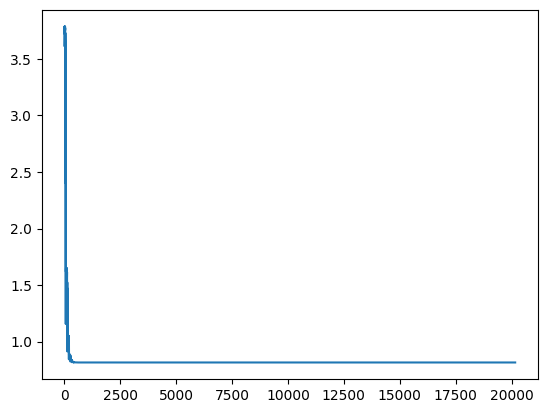

In [42]:
Final_Pred = predict(model,df_test,pre_steps)

In [43]:
len(Final_Pred)

20160

In [44]:
Final_Pred = pd.DataFrame(Final_Pred)
#print(pre)
Final_Pred.describe()

,0
count,20160.000000
mean,0.828905
std,0.165703
min,0.816014
25%,0.816014
50%,0.816014
75%,0.816014
max,3.785435


In [45]:
Final_Pred.to_csv('./output/result1.csv', index=False)